In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

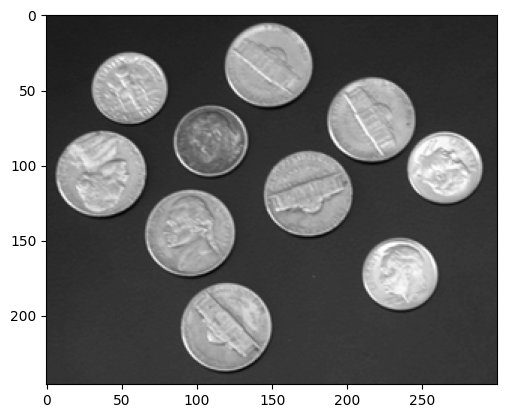

In [3]:
coins = cv2.imread("coins.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(coins, cmap='gray')

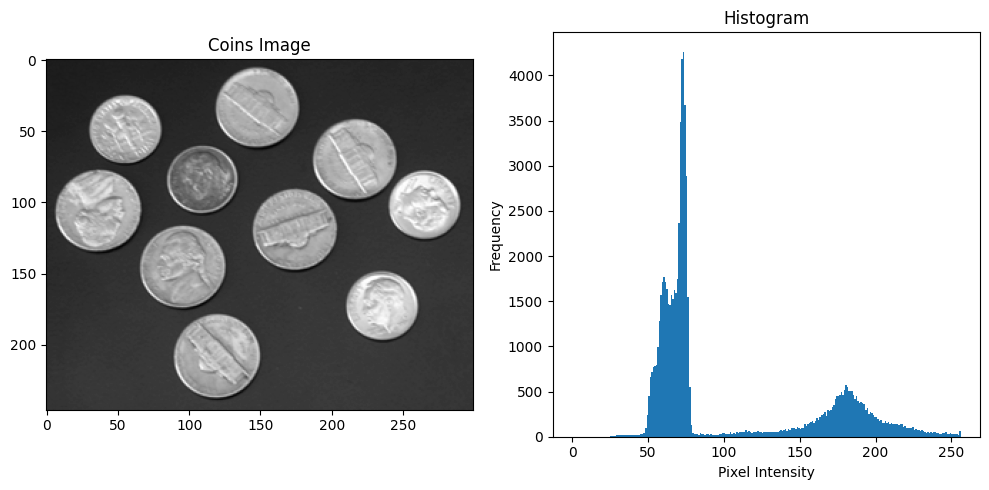

In [4]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Coins Image")
plt.imshow(coins, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Histogram")
plt.hist(coins.ravel(), bins=256, range=[0, 256])
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

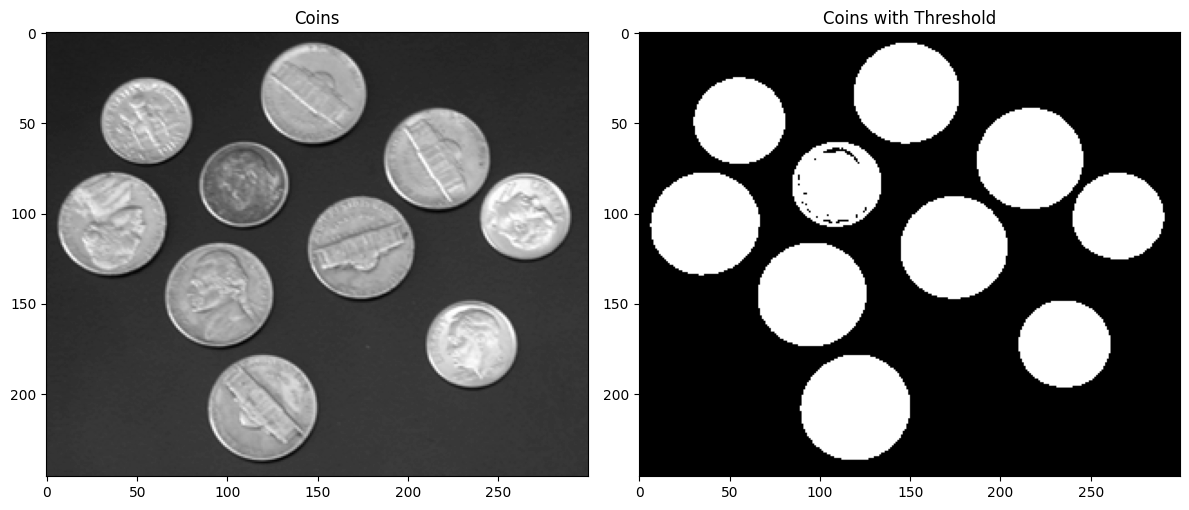

In [11]:
threshold = 100
coins_threshold = np.where(coins > threshold, 1, 0)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Coins")
plt.imshow(coins, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Coins with Threshold")
plt.imshow(coins_threshold, cmap='gray')
plt.tight_layout()
plt.show()

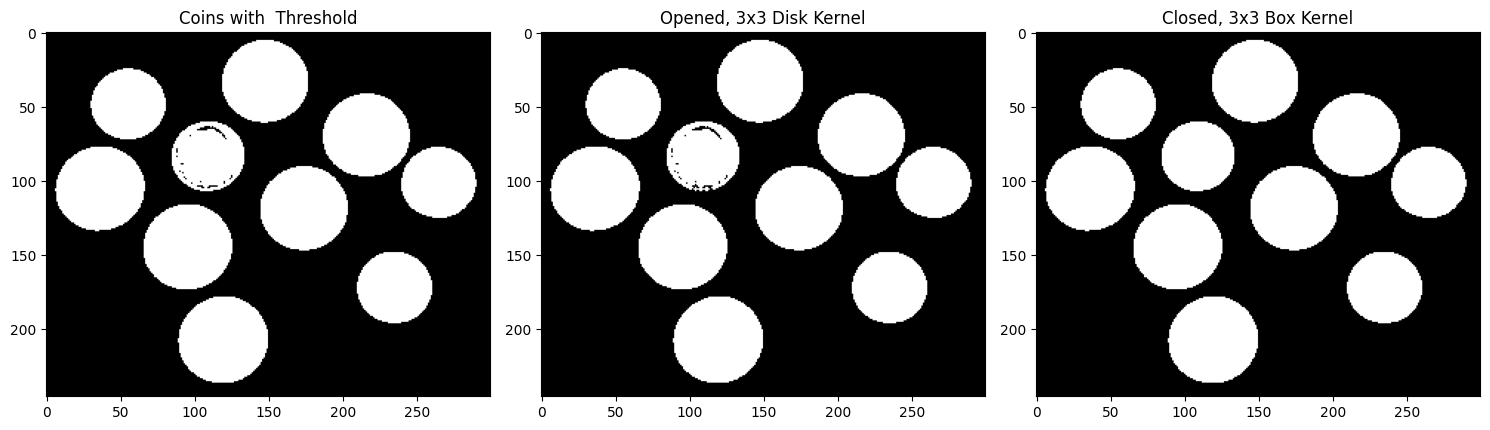

In [17]:
coins_threshold = coins_threshold.astype(dtype=np.uint8)
box_kernel = np.ones((3, 3), np.uint8)
disk_kernel = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0],
], np.uint8)
coins_open = cv2.morphologyEx(coins_threshold, cv2.MORPH_OPEN, disk_kernel) # Erosion followed by Dilation
coins_close = cv2.morphologyEx(coins_threshold, cv2.MORPH_CLOSE, box_kernel) # Dilation followed by Erosion

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Coins with  Threshold")
plt.imshow(coins_threshold, cmap='gray')
plt.subplot(1, 3, 2)
plt.title("Opened, 3x3 Disk Kernel")
plt.imshow(coins_open, cmap='gray')
plt.subplot(1, 3, 3)
plt.title("Closed, 3x3 Box Kernel")
plt.imshow(coins_close, cmap='gray')
plt.tight_layout()
plt.show()

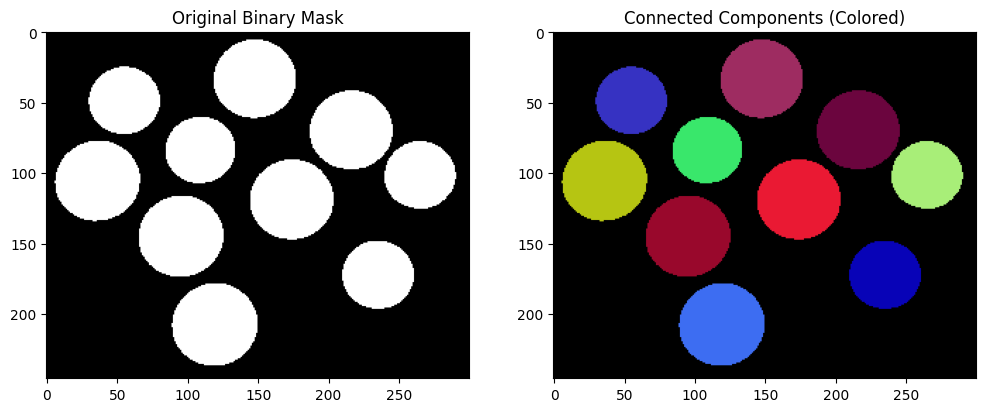

In [26]:
coins_mask = coins_close.copy()
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(coins_mask, connectivity=8)
output_image = np.zeros((coins_mask.shape[0], coins_mask.shape[1], 3), dtype=np.uint8)
colors = np.random.randint(0, 255, size=(num_labels, 3))
for label in range(1, num_labels):  # start from 1 to skip the background
    output_image[labels == label] = colors[label]
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Binary Mask")
plt.imshow(coins_mask, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Connected Components (Colored)")
plt.imshow(output_image)
plt.show()

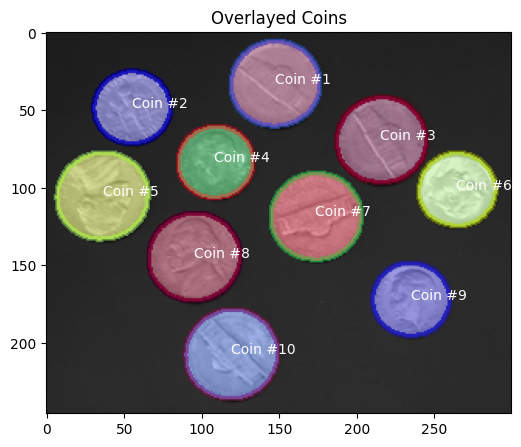

In [40]:
overlay_image = cv2.cvtColor(coins, cv2.COLOR_GRAY2RGB) # from 1D to 3D
contours, _ = cv2.findContours(coins_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cv2.RETR_EXTERNAL: retrieves only the external (outermost) contours. It ignores all child or nested contours.
# cv2.CHAIN_APPROX_SIMPLE: Compresses horizontal, vertical, and diagonal segments and only stores the endpoints of those segments. This method reduces the number of points significantly

plt.figure(figsize=(6, 6))
plt.title("Overlayed Coins")
for i, contour in enumerate(contours, 1):
    cv2.drawContours(overlay_image, [contour], -1, colors[i].tolist(), 2)
    # cv2.drawContours(image, contours, contourIdx, color, thickness[, lineType[, hierarchy[, maxLevel[, offset]]]])
    # controurIdx: If set to -1, all contours in the list will be drawn.
    cx, cy = int(centroids[i][0]), int(centroids[i][1])
    plt.text(cx, cy, f'Coin #{i}', color='white', fontsize=10)
plt.imshow(overlay_image, cmap='gray')
plt.imshow(output_image, alpha=0.4)
plt.show()